In [1]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [2]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

/Users/utkarsh/GitHub/P_NS/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [4]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                   mean       std    median      5.0%     95.0%     n_eff     r_hat
         A[0]      0.87      0.11      0.91      0.73      1.00    717.79      1.00
   alpha_1[0]     -1.81      0.79     -1.74     -3.19     -0.71    373.97      1.00
   alpha_2[0]     -1.69      0.22     -1.69     -2.07     -1.34    618.81      1.00
 alpha_chi[0]      1.23      0.21      1.17      1.00      1.51   1171.78      1.00
    beta_1[0]      0.94      0.40      0.92      0.33      1.63    810.69      1.00
    beta_2[0]      2.95      0.82      2.88      1.56      4.26    562.80      1.00
  beta_chi[0]      3.68      0.72      3.72      2.63      4.86    785.45      1.00
  eta_high[0]     30.39     11.84     30.30     13.97     49.80    761.66      1.00
   eta_low[0]     26.49     12.95     25.98      6.10     46.17    701.12      1.00
   eta_max[0]      5.54      1.70      5.41      2.74      8.28    703.89      1.00
   eta_min[0]     29.70     11.93     29.88     12.85     49.09    928.74  

(array([0.00507715, 0.00253857, 0.01015429, 0.01777002, 0.02538574,
        0.06346434, 0.09138865, 0.11169724, 0.21070162, 0.25893452,
        0.28178168, 0.32239886, 0.29447455, 0.26401166, 0.21324019,
        0.17008444, 0.08885008, 0.06346434, 0.03046288, 0.01269287]),
 array([-2.83711909, -2.4431971 , -2.04927511, -1.65535313, -1.26143114,
        -0.86750915, -0.47358716, -0.07966517,  0.31425682,  0.70817881,
         1.1021008 ,  1.49602279,  1.88994478,  2.28386676,  2.67778875,
         3.07171074,  3.46563273,  3.85955472,  4.25347671,  4.6473987 ,
         5.04132069]),
 <BarContainer object of 20 artists>)

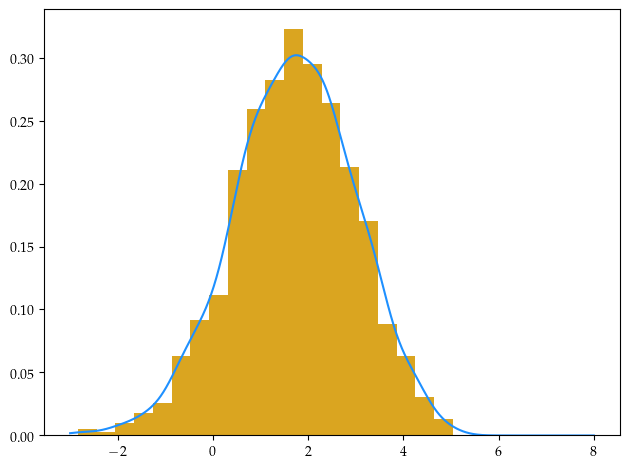

In [12]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(posterior_samples["kappa"].flatten())
x = np.linspace(-3, 8, 1000)
plt.plot(x, kde(x))
plt.hist(posterior_samples["kappa"], bins = 20, density=True)

TypeError: prob_chi() got an unexpected keyword argument 'm'

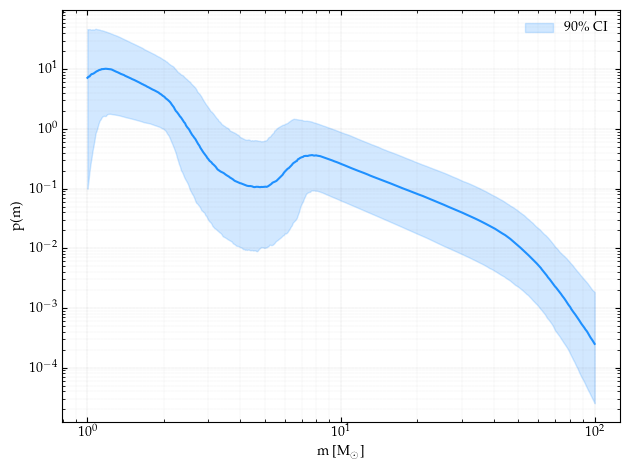

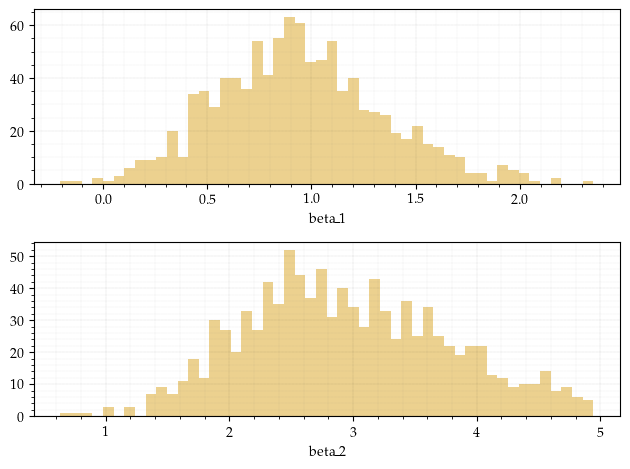

<Figure size 640x480 with 0 Axes>

In [7]:
from config.mass1d_func import pdb
from config.spin_func import prob_chi, prob_costilt
from config.distance_func import powerlaw_redshift

plot_p_m(posterior_samples, function=pdb)
plot_p_pairing(posterior_samples)
plot_p_chi(posterior_samples, function=prob_chi)
plot_p_costilt(posterior_samples, function=prob_costilt)
plot_p_z(posterior_samples, function=powerlaw_redshift)
plt.show()


In [ ]:
import arviz as az
data = az.from_numpyro(mcmc)
var_names_lst = get_non_deterministic_params(mcmc)

if len(var_names_lst) >= 20:
    cut1 = var_names_lst[:20]
    cut2 = var_names_lst[20:]

    assert len(cut1) + len(cut2) == len(var_names_lst)

    az.plot_trace(data, var_names=cut1, compact=True)
    plt.savefig("results/trace1.png")
    az.plot_trace(data, var_names=cut2, compact=True)
    plt.savefig("results/trace2.png")
else:
    az.plot_trace(data, var_names=var_names_lst, compact=True)
    plt.savefig("results/trace.png")